<a href="https://colab.research.google.com/github/neenumohan/LSTM/blob/main/LSTM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [ ]:
filename = "example.txt"
raw_text1 = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text1.lower()

In [ ]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  3234
Total Vocab:  34


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  3134


In [ ]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X, y, epochs=50, batch_size=128, callbacks=callbacks_list)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 34)                8738      
                                                                 
Total params: 272,930
Trainable params: 272,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(X,verbose=True)

98/98 [==============================] - 14s 134ms/step


array([[4.9926173e-03, 5.8286492e-02, 2.8064733e-03, ..., 5.3254731e-05,
        2.8718967e-04, 2.8839894e-04],
       [1.3202665e-02, 1.2371696e-01, 3.2675725e-03, ..., 6.5788074e-05,
        3.2460777e-04, 2.2619743e-04],
       [5.7924567e-03, 1.8961298e-01, 4.7167139e-03, ..., 1.4039486e-04,
        5.4470956e-04, 7.5315946e-04],
       ...,
       [1.5331206e-02, 4.2903572e-01, 1.8333709e-02, ..., 2.6846948e-04,
        1.3953992e-04, 2.3708045e-03],
       [1.5925454e-02, 5.0640559e-01, 2.0463284e-02, ..., 3.4383120e-04,
        5.2360741e-05, 1.6903093e-03],
       [2.1261917e-02, 2.7071175e-01, 1.8168757e-02, ..., 7.5670017e-04,
        2.7012901e-04, 5.9386888e-03]], dtype=float32)

In [ ]:
history=model.fit(X, y, epochs=50, batch_size=128, callbacks=callbacks_list).history

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 3.1541 - accuracy: 0.1509
Epoch 1: loss did not improve from 0.42308
25/25 [==============================] - 23s 751ms/step - loss: 3.1541 - accuracy: 0.1509
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 3.0007 - accuracy: 0.1659
Epoch 2: loss did not improve from 0.42308
25/25 [==============================] - 18s 706ms/step - loss: 3.0007 - accuracy: 0.1659
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 2.9881 - accuracy: 0.1691
Epoch 3: loss did not improve from 0.42308
25/25 [==============================] - 20s 760ms/step - loss: 2.9881 - accuracy: 0.1691
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 2.9907 - accuracy: 0.1710
Epoch 4: loss did not improve from 0.42308
25/25 [==============================] - 18s 726ms/step - loss: 2.9907 - accuracy: 0.1710
Epoch 5/50
25/25 [==============================] - ETA: 0s - loss: 2.9893 - accuracy: 0.169

In [ ]:
model.save('next_word_model.h5')

In [ ]:
import pickle
pickle.dump(history, open("history.p", "wb"))

In [ ]:
from keras import models
from keras.models import load_model
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(history.keys())

dict_keys(['loss', 'accuracy'])


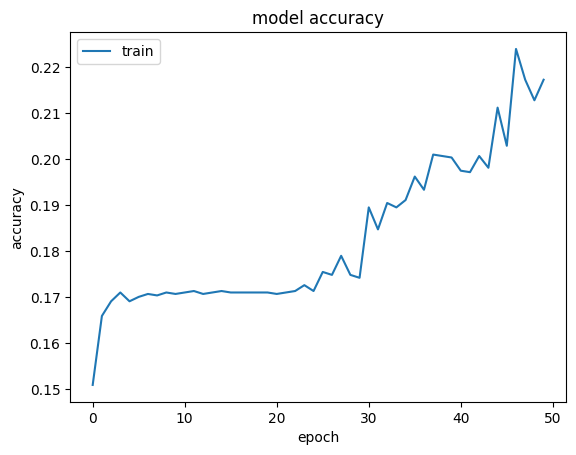

In [ ]:
plt.plot(history['accuracy'])
#plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

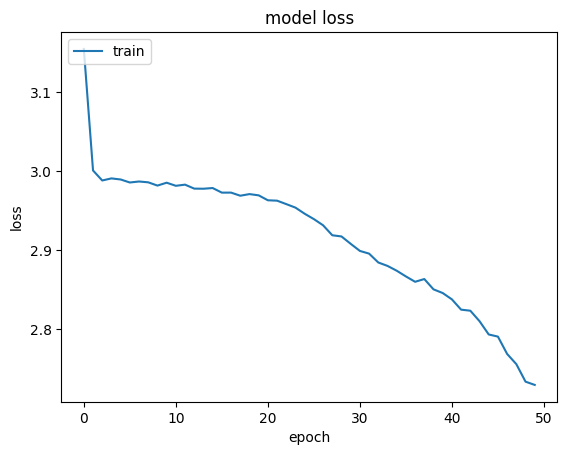

In [ ]:
plt.plot(history['loss'])
#plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')